# CASE STUDY ASSESSMENT 
Your task is to analyze two datasets and deliver your findings in a Jupyter Notebook. We value 
clean code, clear reasoning, and actionable insights as much as the final model performance. 

# Data Preprocessing and Preparation

### Import all libraries and loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trades = pd.read_csv('Downloads/trades.csv')
trades.head()

,pair,amount,volume,side,timestamp,user_id
0,AAVENGN,500.26,0.001222,buy,2024-12-03T01:42:07.072672Z,541-1561-1521-1561-148
1,ADANGN,889.20,0.500000,sell,2024-12-02T11:29:56.860014Z,491-1541-1521-1571-156
2,ADANGN,30653.12,17.100000,sell,2024-11-30T05:25:49.99166Z,1021-1481-1521-1561-1100
3,ADANGN,1978.36,1.100000,sell,2024-12-07T07:41:02.191598Z,981-1571-1521-1971-151
4,ADANGN,2913.62,1.600000,sell,2024-12-07T21:16:11.791118Z,981-1571-1521-1971-151


In [3]:
activity = pd.read_csv('Downloads/user_activitycsv.csv')
activity.head()

,asset,amount,activity_type,timestamp,user_id
0,NGN,131062.0,withdrawal,2025-01-17T14:37:56.806446Z,561-1561-1521-1981-1101
1,NGN,50000.0,withdrawal,2025-01-17T14:37:56.818033Z,971-11001-1521-1571-1101
2,NGN,131062.0,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100
3,NGN,20064.0,withdrawal,2025-01-17T17:05:18.201218Z,531-11001-1521-1571-198
4,NGN,2000.0,withdrawal,2025-01-17T14:38:22.555744Z,501-11021-1521-1561-154


### Data Inspection

In [4]:
trades.describe(include='all')

,pair,amount,volume,side,timestamp,user_id
count,2324,2.324000e+03,2.324000e+03,2324,2324,2324
unique,50,NaN,NaN,2,2324,1199
top,BTCNGN,NaN,NaN,sell,2024-12-03T01:42:07.072672Z,991-1481-1521-1971-156
freq,1035,NaN,NaN,2097,1,23
mean,NaN,1.488173e+05,3.411597e+04,NaN,NaN,NaN
std,NaN,4.729126e+05,1.102014e+06,NaN,NaN,NaN
min,NaN,2.070705e-02,4.990000e-06,NaN,NaN,NaN
25%,NaN,9.897790e+03,3.126025e-04,NaN,NaN,NaN
50%,NaN,2.999806e+04,1.222209e-02,NaN,NaN,NaN
75%,NaN,9.876519e+04,1.372500e+01,NaN,NaN,NaN


In [5]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pair       2324 non-null   object 
 1   amount     2324 non-null   float64
 2   volume     2324 non-null   float64
 3   side       2324 non-null   object 
 4   timestamp  2324 non-null   object 
 5   user_id    2324 non-null   object 
dtypes: float64(2), object(4)
memory usage: 109.1+ KB


In [6]:
trades.shape

(2324, 6)

## Data Cleaning & Transformation

In [7]:
# Checking for duplicates
trades.duplicated().sum()

0

## Checking for Outliers

When checling for outliers in the code below, i observed that a particular value moves out of range

Digging deeper, i noticed that it is not really an outlier because i observed other pairs like it "BTTNGN" also have bigger numbers,so i had to leave it, it is not an outlier

<Axes: >

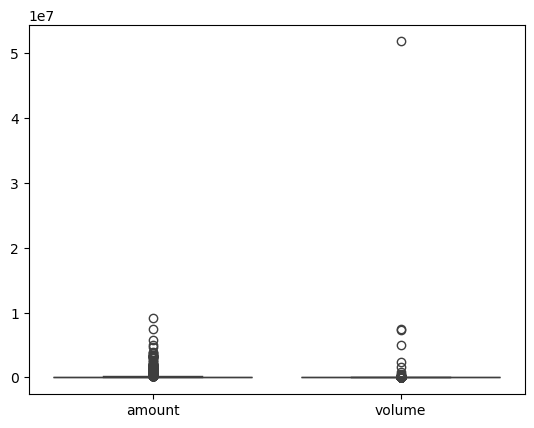

In [8]:
# Checking for outliers
sns.boxplot(trades)

In [9]:
# Checking which row hass the value that seems like an outlier

trades.loc[trades["volume"] == trades["volume"].max()]

,pair,amount,volume,side,timestamp,user_id
1159,BTTNGN,115878.0614,51754382.05,sell,2024-12-07T07:41:09.331794Z,571-1981-1521-1571-1101


In [10]:
# Checking its pair to confirm whether it is an outlier or not
trades[trades['pair'] == 'BTTNGN']

,pair,amount,volume,side,timestamp,user_id
1158,BTTNGN,12054.03562,5.047754e+06,sell,2024-12-05T18:12:43.467287Z,971-1521-1521-1981-154
1159,BTTNGN,115878.06140,5.175438e+07,sell,2024-12-07T07:41:09.331794Z,571-1981-1521-1571-1101
1160,BTTNGN,19260.21711,7.306607e+06,sell,2024-12-04T12:38:03.363097Z,571-1981-1521-1571-1101


In [11]:
trades.head(2)

,pair,amount,volume,side,timestamp,user_id
0,AAVENGN,500.26,0.001222,buy,2024-12-03T01:42:07.072672Z,541-1561-1521-1561-148
1,ADANGN,889.20,0.500000,sell,2024-12-02T11:29:56.860014Z,491-1541-1521-1571-156


## Converting TimeStamp Column to DateTime and Creating Additional Column

In [12]:
# Covert timestamp column to datetime
trades['timestamp'] = pd.to_datetime(trades['timestamp'])

### Creating USD_VOLUME Column
usd_volume = amount / 1500 ( because naira to $ rate is 1500 )

I noticed that if i convert everything in the amount column to USD, Some are already in USD

I decided to divide only pair that contains NGN by 1500, and every other columns thats currently in USD remains untouched

In [13]:
trades['pair'].unique()

array(['AAVENGN', 'ADANGN', 'ALGONGN', 'ATOMNGN', 'AXSUSDT', 'BAKENGN',
       'BCHNGN', 'BCHUSDT', 'BNBNGN', 'BNBUSDT', 'BONKNGN', 'BTCNGN',
       'BTCUSDT', 'BTTNGN', 'C98NGN', 'CHZNGN', 'DOGENGN', 'DOGEUSDT',
       'DOGSNGN', 'ENJNGN', 'ENSNGN', 'ETHNGN', 'ETHUSDT', 'FILNGN',
       'FLOKINGN', 'FLOKIUSDT', 'GALANGN', 'LTCNGN', 'LUNANGN', 'LUNCNGN',
       'MEMENGN', 'NOTNGN', 'PEPENGN', 'PEPEUSDT', 'SHIBNGN', 'SLPNGN',
       'SOLBTC', 'SOLNGN', 'SOLUSDT', 'TONNGN', 'TRXNGN', 'TRXUSDT',
       'USDCNGN', 'USDTNGN', 'WIFNGN', 'WIFUSDT', 'WLDNGN', 'XLMNGN',
       'XRPNGN', 'XRPUSDT'], dtype=object)

### Checking for the best BTCUSDT price for better conversion of SOLBTC to USD

From the code above, i noticed that not even all ends with NGN which i have to convert to USD

Then i noticed SOLBTC that ends with BTC, this shows that the amount is basically in BTC, i decided to covert it to USD also

In [14]:
trades[trades['pair'] == 'SOLBTC']

,pair,amount,volume,side,timestamp,user_id
1469,SOLBTC,0.020707,8.563182,sell,2024-11-28 16:19:38.573498+00:00,1021-11001-1521-1971-152


In [15]:
btcusdt = trades[trades["pair"] == "BTCUSDT"].copy()

# BTC price per trade (USDT ≈ USD)
btcusdt["btc_price_usd"] = btcusdt["amount"] / btcusdt["volume"]

# Volume-weighted BTC price
btc_usd_rate = (
    (btcusdt["btc_price_usd"] * btcusdt["volume"]).sum()
    / btcusdt["volume"].sum()
)


In [16]:
print("BTCUSDT price: ", btc_usd_rate)

BTCUSDT price:  95478.59180623446


In [17]:
trades["usd_volume"] = trades["amount"]

# NGN-quoted pairs
trades.loc[trades["pair"].str.endswith("NGN"), "usd_volume"] = \
    trades.loc[trades["pair"].str.endswith("NGN"), "amount"] / 1500

# BTC-quoted pairs (SOLBTC, ETHBTC, etc.)
trades.loc[trades["pair"].str.endswith("BTC"), "usd_volume"] = \
    trades.loc[trades["pair"].str.endswith("BTC"), "amount"] * btc_usd_rate


In [18]:
trades[trades['pair'] == 'SOLBTC']

,pair,amount,volume,side,timestamp,user_id,usd_volume
1469,SOLBTC,0.020707,8.563182,sell,2024-11-28 16:19:38.573498+00:00,1021-11001-1521-1971-152,1977.079974


In [19]:
trades.head()

,pair,amount,volume,side,timestamp,user_id,usd_volume
0,AAVENGN,500.26,0.001222,buy,2024-12-03 01:42:07.072672+00:00,541-1561-1521-1561-148,0.333507
1,ADANGN,889.20,0.500000,sell,2024-12-02 11:29:56.860014+00:00,491-1541-1521-1571-156,0.592800
2,ADANGN,30653.12,17.100000,sell,2024-11-30 05:25:49.991660+00:00,1021-1481-1521-1561-1100,20.435413
3,ADANGN,1978.36,1.100000,sell,2024-12-07 07:41:02.191598+00:00,981-1571-1521-1971-151,1.318907
4,ADANGN,2913.62,1.600000,sell,2024-12-07 21:16:11.791118+00:00,981-1571-1521-1971-151,1.942413


# Part 1: Exploratory Data Analysis & Market Insights

In this section, we explore trading activity and user behavior on the platform. 
We focus on:

1. Identifying the top traded pairs by USD volume
2. Analyzing BTCNGN price volatility
3. Discovering peak deposit times

These insights help in business decisions like liquidity planning, risk monitoring, and marketing strategy.


### Market Dynamics: Top 3 Most Traded Pairs by USD Volume

The most traded pair on the platform is BTCNGN, with a total trading volume of 136,215,  indicating strong demand for direct Bitcoin-to-Naira trading. This is followed by USDTNGN (59,181), reflecting high usage of stablecoins as a fiat on-ramp and store of value. BTCUSDT ($13,444) ranks third, suggesting that while Bitcoin–USD trading exists, users predominantly prefer local currency (NGN) pairs.

Business Insight:
Users show a clear preference for NGN-denominated trading pairs, highlighting the importance of local fiat liquidity and supporting BTCNGN and USDTNGN as strategic markets for growth and liquidity provisioning.

In [20]:
pair_by_vol = trades.pivot_table(index= 'pair', values= 'usd_volume', aggfunc= 'sum').sort_values(by='usd_volume', ascending=False).head(3)
pair_by_vol

,usd_volume
pair,
BTCNGN,136215.48868
USDTNGN,59180.57358
BTCUSDT,13443.57000


### Volatility Analysis: BTCNGN

2. Analyzing BTCNGN price volatility 

In [21]:
# Filter BTCNGN trades
btc = trades[trades["pair"] == "BTCNGN"].copy()

# Compute unit price for BTCNGN
btc["unit_price"] = btc["amount"] / btc["volume"]

# Set timestamp as index
btc.set_index("timestamp", inplace=True)

# Daily price volatility
daily_vol = btc["unit_price"].resample("D").std()

# 7-day rolling average
rolling_vol = daily_vol.rolling(7).mean()


### Checking the results of each code for better insight

In [22]:
btc.head()

,pair,amount,volume,side,user_id,usd_volume,unit_price
timestamp,,,,,,,
2024-12-04 12:08:08.522367+00:00,BTCNGN,4954.28,0.000033,sell,531-11001-1521-1571-198,3.302853,1.513219e+08
2024-12-02 11:09:55.042640+00:00,BTCNGN,9896.29,0.000064,sell,531-11001-1521-1571-198,6.597527,1.553334e+08
2024-11-28 16:06:43.218713+00:00,BTCNGN,70188.51,0.000445,sell,531-11001-1521-1571-198,46.792340,1.577873e+08
2024-11-27 21:17:00.288607+00:00,BTCNGN,15000.31,0.000093,sell,531-11001-1521-1571-198,10.000207,1.608095e+08
2024-12-10 13:39:00.085610+00:00,BTCNGN,2971.21,0.000019,sell,531-11001-1521-1571-198,1.980807,1.533132e+08


In [23]:
daily_vol

timestamp
2024-11-27 00:00:00+00:00    4.956252e+05
2024-11-28 00:00:00+00:00    6.391967e+05
2024-11-29 00:00:00+00:00    6.887824e+05
2024-11-30 00:00:00+00:00    2.130483e+06
2024-12-01 00:00:00+00:00    2.210476e+06
                                 ...     
2025-07-14 00:00:00+00:00             NaN
2025-07-15 00:00:00+00:00             NaN
2025-07-16 00:00:00+00:00             NaN
2025-07-17 00:00:00+00:00             NaN
2025-07-18 00:00:00+00:00    8.727070e+05
Freq: D, Name: unit_price, Length: 234, dtype: float64

### Insight on the daily volatility

The daily volatility values represent the standard deviation of BTCNGN prices within each day, measured in Naira. Higher values indicate larger intraday price fluctuations, while lower values reflect more stable trading conditions. Significant volatility spikes observed around late November and early December suggest periods of heightened market activity or external market events. Days with NaN values indicate insufficient trading activity to compute volatility, highlighting periods of low liquidity in the BTCNGN market.

In [24]:
rolling_vol.head(20)

timestamp
2024-11-27 00:00:00+00:00             NaN
2024-11-28 00:00:00+00:00             NaN
2024-11-29 00:00:00+00:00             NaN
2024-11-30 00:00:00+00:00             NaN
2024-12-01 00:00:00+00:00             NaN
2024-12-02 00:00:00+00:00             NaN
2024-12-03 00:00:00+00:00    1.205369e+06
2024-12-04 00:00:00+00:00    1.415983e+06
2024-12-05 00:00:00+00:00    1.882924e+06
2024-12-06 00:00:00+00:00    1.882017e+06
2024-12-07 00:00:00+00:00    1.878136e+06
2024-12-08 00:00:00+00:00    1.662512e+06
2024-12-09 00:00:00+00:00    1.872897e+06
2024-12-10 00:00:00+00:00    1.777541e+06
2024-12-11 00:00:00+00:00    1.602758e+06
2024-12-12 00:00:00+00:00             NaN
2024-12-13 00:00:00+00:00             NaN
2024-12-14 00:00:00+00:00             NaN
2024-12-15 00:00:00+00:00             NaN
2024-12-16 00:00:00+00:00             NaN
Freq: D, Name: unit_price, dtype: float64

In [25]:
rolling_vol.tail(20)

timestamp
2025-06-29 00:00:00+00:00   NaN
2025-06-30 00:00:00+00:00   NaN
2025-07-01 00:00:00+00:00   NaN
2025-07-02 00:00:00+00:00   NaN
2025-07-03 00:00:00+00:00   NaN
2025-07-04 00:00:00+00:00   NaN
2025-07-05 00:00:00+00:00   NaN
2025-07-06 00:00:00+00:00   NaN
2025-07-07 00:00:00+00:00   NaN
2025-07-08 00:00:00+00:00   NaN
2025-07-09 00:00:00+00:00   NaN
2025-07-10 00:00:00+00:00   NaN
2025-07-11 00:00:00+00:00   NaN
2025-07-12 00:00:00+00:00   NaN
2025-07-13 00:00:00+00:00   NaN
2025-07-14 00:00:00+00:00   NaN
2025-07-15 00:00:00+00:00   NaN
2025-07-16 00:00:00+00:00   NaN
2025-07-17 00:00:00+00:00   NaN
2025-07-18 00:00:00+00:00   NaN
Freq: D, Name: unit_price, dtype: float64

### Insight on the rolling average

The 7-day rolling volatility represents the average BTCNGN price fluctuation over the previous week. Initial and later NaN values occur because a full 7-day window of valid trading data was not available, indicating either the start of the dataset or periods of low trading activity.

### Plotting the graph of the 7 days rolling average for better understanding

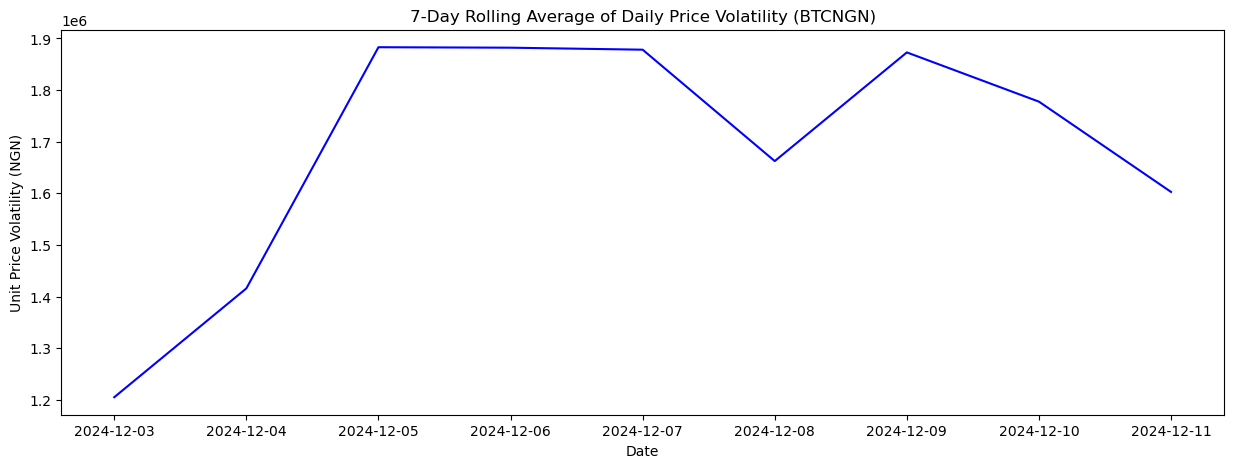

In [26]:
plt.figure(figsize=(15,5))
plt.plot(rolling_vol, color="blue")
plt.title("7-Day Rolling Average of Daily Price Volatility (BTCNGN)")
plt.xlabel("Date")
plt.ylabel("Unit Price Volatility (NGN)")
plt.show()

## User Behaviour Analysis

In [27]:
activity.head()

,asset,amount,activity_type,timestamp,user_id
0,NGN,131062.0,withdrawal,2025-01-17T14:37:56.806446Z,561-1561-1521-1981-1101
1,NGN,50000.0,withdrawal,2025-01-17T14:37:56.818033Z,971-11001-1521-1571-1101
2,NGN,131062.0,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100
3,NGN,20064.0,withdrawal,2025-01-17T17:05:18.201218Z,531-11001-1521-1571-198
4,NGN,2000.0,withdrawal,2025-01-17T14:38:22.555744Z,501-11021-1521-1561-154


 Is there a specific day of the week or hour of the day when deposits are 
highest? Visualize your findings to show these peak times. 

### Data Transformation

In [28]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asset          4845 non-null   object 
 1   amount         4845 non-null   float64
 2   activity_type  4845 non-null   object 
 3   timestamp      4845 non-null   object 
 4   user_id        4845 non-null   object 
dtypes: float64(1), object(4)
memory usage: 189.4+ KB


In [29]:
activity.describe()

,amount
count,4.845000e+03
mean,7.721320e+04
std,3.948503e+05
min,1.000000e-04
25%,1.039660e+03
50%,1.280000e+04
75%,5.000000e+04
max,1.959146e+07


In [30]:
# Convert to datetime 

activity['timestamp'] = pd.to_datetime(activity['timestamp'])

In [31]:
# Extracting Month, Day and hour from timestamp

activity['month'] = activity['timestamp'].dt.month_name()
activity['day'] = activity['timestamp'].dt.day_name()
activity['hour'] = activity['timestamp'].dt.hour

In [32]:
activity.head()

,asset,amount,activity_type,timestamp,user_id,month,day,hour
0,NGN,131062.0,withdrawal,2025-01-17 14:37:56.806446+00:00,561-1561-1521-1981-1101,January,Friday,14
1,NGN,50000.0,withdrawal,2025-01-17 14:37:56.818033+00:00,971-11001-1521-1571-1101,January,Friday,14
2,NGN,131062.0,deposit,2025-01-17 14:37:56.853225+00:00,481-11011-1521-1971-1100,January,Friday,14
3,NGN,20064.0,withdrawal,2025-01-17 17:05:18.201218+00:00,531-11001-1521-1571-198,January,Friday,17
4,NGN,2000.0,withdrawal,2025-01-17 14:38:22.555744+00:00,501-11021-1521-1561-154,January,Friday,14


In [33]:
# Bringing out only where activity_type is "Deposit"

deposit = activity[activity['activity_type'] == 'deposit']
deposit.head()

,asset,amount,activity_type,timestamp,user_id,month,day,hour
2,NGN,131062.000000,deposit,2025-01-17 14:37:56.853225+00:00,481-11011-1521-1971-1100,January,Friday,14
5,USDT,10.000000,deposit,2025-01-17 14:38:50.413408+00:00,481-11001-1521-1981-154,January,Friday,14
8,NGN,2000.000000,deposit,2025-01-17 14:39:45.669391+00:00,971-1531-1521-1981-153,January,Friday,14
11,SOL,0.009095,deposit,2025-01-17 14:42:06.457063+00:00,991-1511-1521-1561-198,January,Friday,14
12,SOL,0.101000,deposit,2025-01-17 14:42:16.360057+00:00,991-1541-1521-1971-153,January,Friday,14


### Deposit Trend by Day

In [34]:
deposit_by_day = deposit.groupby('day')['amount'].sum()
deposit_by_day

day
Friday       2.314969e+07
Monday       2.182000e+04
Saturday     1.550753e+07
Sunday       3.150000e+03
Thursday     2.983444e+01
Wednesday    1.849214e+07
Name: amount, dtype: float64

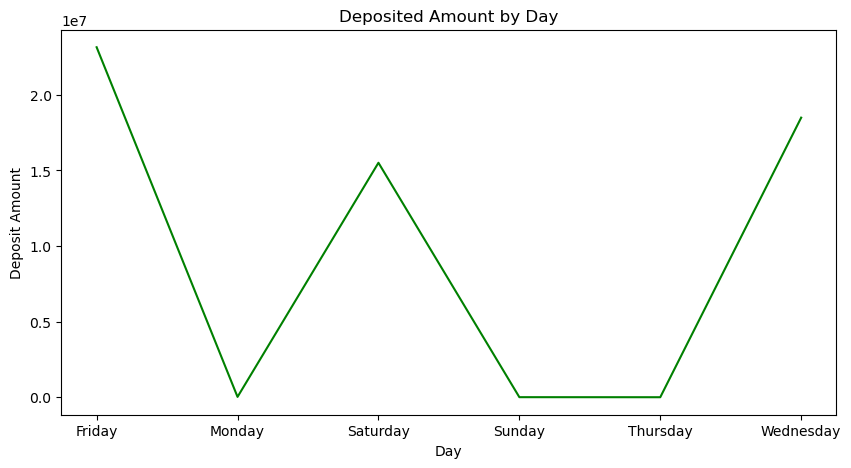

In [35]:
plt.figure(figsize=(10,5))
plt.plot(deposit_by_day, color= 'green')
plt.xlabel('Day')
plt.ylabel('Deposit Amount')
plt.title('Deposited Amount by Day')
plt.show()

### Insights

Deposit activity shows a clear weekly pattern, with the highest volumes occurring on Fridays, followed by Wednesdays and Saturdays. This suggests that users prefer to fund their accounts toward the end of the week, likely in preparation for increased trading activity during weekends. In contrast, deposit volumes are minimal on Mondays, Thursdays, and Sundays, indicating lower user engagement on these days.

### Deposit Trend by Hour 

In [36]:
deposit_by_hour = deposit.groupby('hour')['amount'].sum()
deposit_by_hour

hour
0     7.888382e+04
1     4.224380e+04
2     5.021891e+02
3     4.550902e+04
4     2.164225e+05
5     2.222451e+05
6     2.965273e+06
7     1.252926e+06
8     2.314144e+06
9     4.613537e+06
10    1.204685e+06
11    6.899667e+06
12    8.781662e+06
13    8.723062e+05
14    3.649478e+05
15    6.657647e+06
16    4.496001e+06
17    4.967763e+06
18    2.740936e+06
19    2.712505e+06
20    3.676664e+06
21    1.367471e+06
22    2.183134e+05
23    4.620988e+05
Name: amount, dtype: float64

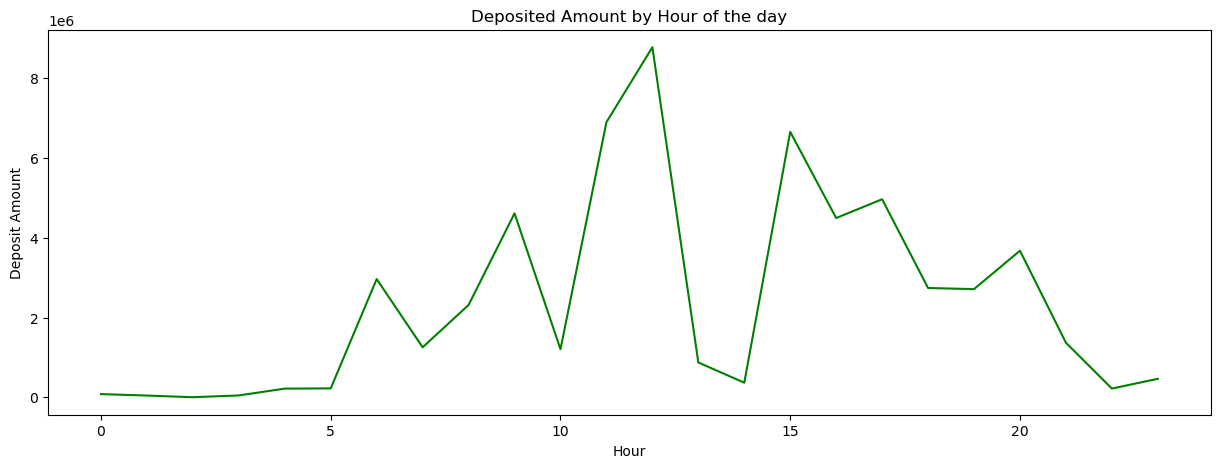

In [37]:
plt.figure(figsize=(15,5))
plt.plot(deposit_by_hour, color= 'green')
plt.xlabel('Hour')
plt.ylabel('Deposit Amount')
plt.title('Deposited Amount by Hour of the day')
plt.show()

#  Part 2: Fraud Detection Model 

## Feature Engineering

In [38]:
activity.head()

,asset,amount,activity_type,timestamp,user_id,month,day,hour
0,NGN,131062.0,withdrawal,2025-01-17 14:37:56.806446+00:00,561-1561-1521-1981-1101,January,Friday,14
1,NGN,50000.0,withdrawal,2025-01-17 14:37:56.818033+00:00,971-11001-1521-1571-1101,January,Friday,14
2,NGN,131062.0,deposit,2025-01-17 14:37:56.853225+00:00,481-11011-1521-1971-1100,January,Friday,14
3,NGN,20064.0,withdrawal,2025-01-17 17:05:18.201218+00:00,531-11001-1521-1571-198,January,Friday,17
4,NGN,2000.0,withdrawal,2025-01-17 14:38:22.555744+00:00,501-11021-1521-1561-154,January,Friday,14


In [39]:
activity['asset'].unique()

array(['NGN', 'USDT', 'SOL', 'TRX', 'LTC', 'ETH', 'BTC', 'BNB', 'DOGE',
       'XRP', 'ADA', 'TON', 'USDC'], dtype=object)

### Separate Deposits from Withdrawal

In [40]:
deposits = activity[activity["activity_type"] == "deposit"].copy()
withdrawals = activity[activity["activity_type"] == "withdrawal"].copy()

In [41]:
# How much and how often does a user deposits

deposit_features = (
    deposits
    .groupby("user_id")
    .agg(
        total_deposit_amount=("amount", "sum"),
        deposit_count=("amount", "count"),
        first_deposit_time=("timestamp", "min")
    )
)


In [42]:
deposit_features.head()

,total_deposit_amount,deposit_count,first_deposit_time
user_id,,,
1001-11001-1521-1561-154,100150.002099,3,2025-01-17 17:38:26.189682+00:00
1001-11001-1521-1571-155,0.000267,1,2025-03-12 15:08:57.744625+00:00
1001-11001-1521-1971-1102,0.000242,1,2025-01-18 06:42:12.823378+00:00
1001-11001-1521-1981-156,0.172140,7,2025-01-17 15:25:22.825389+00:00
1001-11001-1521-1981-157,0.001116,2,2025-01-17 16:31:37.196442+00:00


In [43]:
# How fast and how often does a user withdraws

withdraw_features = (
    withdrawals
    .groupby("user_id")
    .agg(
        total_withdraw_amount=("amount", "sum"),
        withdrawal_count=("amount", "count"),
        first_withdraw_time=("timestamp", "min")
    )
)


In [44]:
withdraw_features.head()

,total_withdraw_amount,withdrawal_count,first_withdraw_time
user_id,,,
1001-11001-1521-1561-154,431339.0,20,2025-01-17 14:56:53.191137+00:00
1001-11001-1521-1571-155,32888.0,1,2025-03-12 15:31:47.549399+00:00
1001-11001-1521-1971-1102,40300.0,1,2025-01-18 07:16:01.131864+00:00
1001-11001-1521-1971-156,1983.0,1,2025-04-01 12:43:29.495136+00:00
1001-11001-1521-1981-156,93089.0,6,2025-01-17 15:23:24.859884+00:00


In [45]:
# This captures “deposit → immediate exit” behavior.

time_features = deposit_features[["first_deposit_time"]] \
    .join(withdraw_features[["first_withdraw_time"]], how="left")

time_features["hours_to_first_withdraw"] = (
    time_features["first_withdraw_time"] -
    time_features["first_deposit_time"]
).dt.total_seconds() / 3600


In [46]:
time_features.head()

,first_deposit_time,first_withdraw_time,hours_to_first_withdraw
user_id,,,
1001-11001-1521-1561-154,2025-01-17 17:38:26.189682+00:00,2025-01-17 14:56:53.191137+00:00,-2.692500
1001-11001-1521-1571-155,2025-03-12 15:08:57.744625+00:00,2025-03-12 15:31:47.549399+00:00,0.380501
1001-11001-1521-1971-1102,2025-01-18 06:42:12.823378+00:00,2025-01-18 07:16:01.131864+00:00,0.563419
1001-11001-1521-1981-156,2025-01-17 15:25:22.825389+00:00,2025-01-17 15:23:24.859884+00:00,-0.032768
1001-11001-1521-1981-157,2025-01-17 16:31:37.196442+00:00,2025-01-17 16:47:59.117039+00:00,0.272756


In [47]:
# We measure how much they actually traded, regardless of price.

trade_features = (
    trades
    .groupby("user_id")
    .agg(
        total_trade_volume=("volume", "sum"),
        trade_count=("volume", "count"),
        unique_assets_traded=("pair", "nunique")
    )
)


In [48]:
trade_features.head()

,total_trade_volume,trade_count,unique_assets_traded
user_id,,,
1001-11001-1521-1561-154,0.000172,3,1
1001-11001-1521-1571-155,46.800000,1,1
1001-11001-1521-1971-1102,0.000458,1,1
1001-11001-1521-1971-156,0.314706,1,1
1001-11001-1521-1981-156,0.021141,1,1


In [49]:
# Modelling

user_features = (
    deposit_features
    .join(withdraw_features, how="outer")
    .join(trade_features, how="left")
    .join(time_features[["hours_to_first_withdraw"]], how="left")
)

user_features.fillna(0, inplace=True)


C:\Users\D-P\AppData\Local\Temp\ipykernel_3668\3406283059.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  user_features.fillna(0, inplace=True)


In [50]:
# Ratios expose fraud patterns much better than raw values.

user_features["withdraw_to_deposit_ratio"] = (
    user_features["total_withdraw_amount"] /
    user_features["total_deposit_amount"]
)

user_features["trade_to_deposit_ratio"] = (
    user_features["total_trade_volume"] /
    user_features["total_deposit_amount"]
)

user_features.replace([np.inf, -np.inf], 0, inplace=True)


In [51]:
# Rule-Based Fraud Label (Target Creation)

user_features["is_suspicious"] = (
    (user_features["withdraw_to_deposit_ratio"] >= 0.8) &
    (user_features["trade_to_deposit_ratio"] <= 0.2) &
    (user_features["hours_to_first_withdraw"] <= 24)
).astype(int)


In [52]:
user_features.head()

,total_deposit_amount,deposit_count,first_deposit_time,total_withdraw_amount,withdrawal_count,first_withdraw_time,total_trade_volume,trade_count,unique_assets_traded,hours_to_first_withdraw,withdraw_to_deposit_ratio,trade_to_deposit_ratio,is_suspicious
user_id,,,,,,,,,,,,,
1001-11001-1521-1561-154,100150.002099,3.0,2025-01-17 17:38:26.189682+00:00,431339.0,20.0,2025-01-17 14:56:53.191137+00:00,0.000172,3,1,-2.692500,4.306930e+00,1.716925e-09,1
1001-11001-1521-1571-155,0.000267,1.0,2025-03-12 15:08:57.744625+00:00,32888.0,1.0,2025-03-12 15:31:47.549399+00:00,46.800000,1,1,0.380501,1.231714e+08,1.752743e+05,0
1001-11001-1521-1971-1102,0.000242,1.0,2025-01-18 06:42:12.823378+00:00,40300.0,1.0,2025-01-18 07:16:01.131864+00:00,0.000458,1,1,0.563419,1.662953e+08,1.891557e+00,0
1001-11001-1521-1971-156,0.000000,0.0,0,1983.0,1.0,2025-04-01 12:43:29.495136+00:00,0.314706,1,1,0.000000,0.000000e+00,0.000000e+00,0
1001-11001-1521-1981-156,0.172140,7.0,2025-01-17 15:25:22.825389+00:00,93089.0,6.0,2025-01-17 15:23:24.859884+00:00,0.021141,1,1,-0.032768,5.407757e+05,1.228115e-01,1


### Asset-Normalized Approach (Observation & Rationale)

While working with the user_activity dataset, I observed that deposit and withdrawal amounts are recorded in different crypto assets (such as BTC, ETH, SOL, and USDT), and the dataset does not provide unit prices for these assets at the time of each transaction. Converting these values to USD would therefore require external pricing data and additional assumptions, which could introduce inaccuracies into the analysis.

To avoid this, I chose an asset-normalized approach that focuses on user behavior rather than absolute monetary value. The analysis emphasizes patterns such as how quickly users withdraw after depositing, how much trading activity occurs relative to deposits, and the frequency of deposits and withdrawals.

This approach aligns well with the fraud pattern being investigated, where suspicious users typically deposit funds, make minimal trades, and then withdraw most or all of their funds shortly afterward. Since this behavior is driven by timing and ratios rather than price levels, using asset-normalized features allows for a more reliable and robust fraud detection model without relying on unavailable price data.

In [53]:
# Checking the value count of the our target

user_features["is_suspicious"].value_counts()


is_suspicious
0    1043
1     156
Name: count, dtype: int64

### Insight from the result above

The resulting class distribution shows that approximately 13% of users exhibit suspicious behavior, which aligns with real-world fraud prevalence and confirms that the labeling rules are neither overly strict nor overly permissive.

In [54]:
user_features.groupby("is_suspicious")[[
    "withdraw_to_deposit_ratio",
    "trade_to_deposit_ratio",
    "hours_to_first_withdraw"
]].mean()


,withdraw_to_deposit_ratio,trade_to_deposit_ratio,hours_to_first_withdraw
is_suspicious,,,
0,3.403614e+07,96974.286224,-14.071627
1,3.756575e+07,0.062127,-50.045983


In [55]:
# Fixing negative time values ( If withdrawal happened before first observed deposit, treat it as immediate withdrawal.)

user_features["hours_to_first_withdraw"] = user_features[
    "hours_to_first_withdraw"
].clip(lower=0)


In [56]:
user_features.groupby("is_suspicious")[[
    "withdraw_to_deposit_ratio",
    "trade_to_deposit_ratio",
    "hours_to_first_withdraw"
]].mean()


,withdraw_to_deposit_ratio,trade_to_deposit_ratio,hours_to_first_withdraw
is_suspicious,,,
0,3.403614e+07,96974.286224,15.360664
1,3.756575e+07,0.062127,1.419319


### Insight from the result above

During feature validation, negative values were observed in the time-to-withdrawal feature, indicating that some users had withdrawal activity before their first observed deposit within the dataset window. This was handled by clipping negative values to zero, representing immediate withdrawal behavior. Additionally, extreme ratio values caused by very small deposits were capped to reduce the influence of outliers while preserving behavioral signals.

## Building the Fraud Detection Model

In [57]:
user_features

,total_deposit_amount,deposit_count,first_deposit_time,total_withdraw_amount,withdrawal_count,first_withdraw_time,total_trade_volume,trade_count,unique_assets_traded,hours_to_first_withdraw,withdraw_to_deposit_ratio,trade_to_deposit_ratio,is_suspicious
user_id,,,,,,,,,,,,,
1001-11001-1521-1561-154,100150.002099,3.0,2025-01-17 17:38:26.189682+00:00,431339.0,20.0,2025-01-17 14:56:53.191137+00:00,0.000172,3,1,0.000000,4.306930e+00,1.716925e-09,1
1001-11001-1521-1571-155,0.000267,1.0,2025-03-12 15:08:57.744625+00:00,32888.0,1.0,2025-03-12 15:31:47.549399+00:00,46.800000,1,1,0.380501,1.231714e+08,1.752743e+05,0
1001-11001-1521-1971-1102,0.000242,1.0,2025-01-18 06:42:12.823378+00:00,40300.0,1.0,2025-01-18 07:16:01.131864+00:00,0.000458,1,1,0.563419,1.662953e+08,1.891557e+00,0
1001-11001-1521-1971-156,0.000000,0.0,0,1983.0,1.0,2025-04-01 12:43:29.495136+00:00,0.314706,1,1,0.000000,0.000000e+00,0.000000e+00,0
1001-11001-1521-1981-156,0.172140,7.0,2025-01-17 15:25:22.825389+00:00,93089.0,6.0,2025-01-17 15:23:24.859884+00:00,0.021141,1,1,0.000000,5.407757e+05,1.228115e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991-1991-1521-1971-1100,30150.000000,1.0,2025-01-17 22:27:41.672146+00:00,0.0,0.0,0,0.000095,1,1,0.000000,0.000000e+00,3.150912e-09,0
991-1991-1521-1971-1101,10000.000000,1.0,2025-03-12 16:59:18.184067+00:00,0.0,0.0,0,0.000447,2,2,0.000000,0.000000e+00,4.465300e-08,0
991-1991-1521-1981-1101,0.000000,0.0,0,59000.0,4.0,2025-01-17 15:53:54.911309+00:00,0.000944,1,1,0.000000,0.000000e+00,0.000000e+00,0


In [58]:
user_features.columns

Index(['total_deposit_amount', 'deposit_count', 'first_deposit_time',
       'total_withdraw_amount', 'withdrawal_count', 'first_withdraw_time',
       'total_trade_volume', 'trade_count', 'unique_assets_traded',
       'hours_to_first_withdraw', 'withdraw_to_deposit_ratio',
       'trade_to_deposit_ratio', 'is_suspicious'],
      dtype='object')

### Defining Feature column

In [59]:
# Defining feature columns
feature_cols = [
    "total_deposit_amount",
    "deposit_count",
    "total_withdraw_amount",
    "withdrawal_count",
    "total_trade_volume",
    "trade_count",
    "unique_assets_traded",
    "hours_to_first_withdraw",
    "withdraw_to_deposit_ratio",
    "trade_to_deposit_ratio"
]

x = user_features[feature_cols]
y = user_features["is_suspicious"]


In [60]:
y.head()

user_id
1001-11001-1521-1561-154     1
1001-11001-1521-1571-155     0
1001-11001-1521-1971-1102    0
1001-11001-1521-1971-156     0
1001-11001-1521-1981-156     1
Name: is_suspicious, dtype: int32

In [61]:
x.head(2)

,total_deposit_amount,deposit_count,total_withdraw_amount,withdrawal_count,total_trade_volume,trade_count,unique_assets_traded,hours_to_first_withdraw,withdraw_to_deposit_ratio,trade_to_deposit_ratio
user_id,,,,,,,,,,
1001-11001-1521-1561-154,100150.002099,3.0,431339.0,20.0,0.000172,3,1,0.000000,4.306930e+00,1.716925e-09
1001-11001-1521-1571-155,0.000267,1.0,32888.0,1.0,46.800000,1,1,0.380501,1.231714e+08,1.752743e+05


In [62]:
# I noticed that my x and y has index, its due to the fact that i used "group by in the initial stage , i have to drop the index now

y = user_features["is_suspicious"].reset_index(drop=True)
x = user_features[feature_cols].reset_index(drop=True)


In [63]:
x.head(2)

,total_deposit_amount,deposit_count,total_withdraw_amount,withdrawal_count,total_trade_volume,trade_count,unique_assets_traded,hours_to_first_withdraw,withdraw_to_deposit_ratio,trade_to_deposit_ratio
0,100150.002099,3.0,431339.0,20.0,0.000172,3,1,0.000000,4.306930e+00,1.716925e-09
1,0.000267,1.0,32888.0,1.0,46.800000,1,1,0.380501,1.231714e+08,1.752743e+05


In [64]:
y.head(2)

0    1
1    0
Name: is_suspicious, dtype: int32

### Split the data into training and testing set

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

### Scaling the model

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)

In [67]:
x_train_scaled

array([[-0.07342693,  0.09940641, -0.25640453, ..., -0.09207069,
        -0.37406074, -0.04779734],
       [-0.07343584, -0.06217113, -0.24530758, ..., -0.09207069,
        -0.37101035, -0.04779748],
       [-0.07343591, -0.22374867, -0.1298966 , ..., -0.09207069,
        -0.37406074, -0.04779836],
       ...,
       [-0.07343591, -0.22374867, -0.21056832, ..., -0.09207069,
        -0.37406074, -0.04779836],
       [-0.0734359 , -0.06217113,  0.7456666 , ..., -0.08466198,
         1.50698526, -0.04779783],
       [ 0.0754083 ,  0.09940641, -0.25640423, ..., -0.09132437,
        -0.37406074, -0.04779836]])

In [68]:
x_test_scaled

array([[-0.07343591, -0.22374867, -0.15098125, ..., -0.09207069,
        -0.37406074, -0.04779836],
       [-0.07343591, -0.22374867, -0.23458649, ..., -0.09207069,
        -0.37406074, -0.04779836],
       [-0.07343585, -0.06217113, -0.24916791, ..., -0.08232269,
        -0.3717837 , -0.04779674],
       ...,
       [-0.07343591, -0.06217113, -0.24347872, ..., -0.08497148,
         0.71096424, -0.04777653],
       [-0.07343591, -0.22374867, -0.0725115 , ..., -0.09207069,
        -0.37406074, -0.04779836],
       [-0.07343591, -0.22374867, -0.2325972 , ..., -0.09207069,
        -0.37406074, -0.04779836]])

### Training the model

### Training the model using Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state= 42, class_weight = 'balanced')

In [70]:
# Train the model

lr.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [71]:
# Making Prediction

lr_pred = lr.predict(x_test_scaled)
lr_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
# showing it side by side the y_test

lr_df = pd.DataFrame({'Actual': y_test, 'Prediction': lr_pred})
lr_df

,Actual,Prediction
986,0,0
637,0,0
41,0,0
615,0,1
875,0,0
...,...,...
574,0,0
802,0,0
522,0,0
329,0,0


##### Evaluating the model

In [73]:
from sklearn.metrics import confusion_matrix, classification_report


In [74]:
# Evaluating the model using confusion matrix

cm_lr = confusion_matrix(y_test, lr_pred)
cm_lr

array([[181,  28],
       [ 17,  14]], dtype=int64)

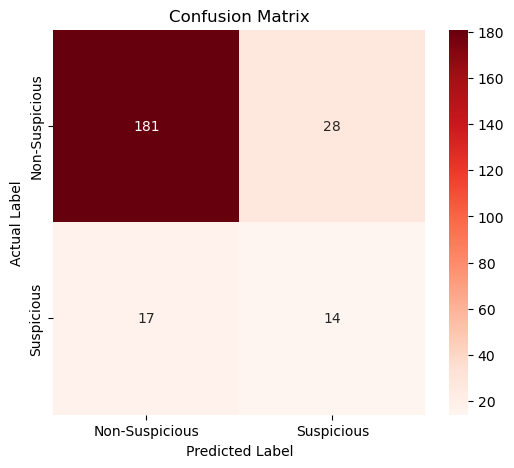

In [96]:
# Plot confusion matrix for Logistic Regression


plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Reds", xticklabels=["Non-Suspicious", "Suspicious"], yticklabels=["Non-Suspicious", "Suspicious"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [75]:
# Evaluating the model using classification report

cr_lr = classification_report(y_test, lr_pred)
cr_lr

'              precision    recall  f1-score   support\n\n           0       0.91      0.87      0.89       209\n           1       0.33      0.45      0.38        31\n\n    accuracy                           0.81       240\n   macro avg       0.62      0.66      0.64       240\nweighted avg       0.84      0.81      0.82       240\n'

In [76]:
# Evaluating the model by checking the precision and recall score

from sklearn.metrics import precision_score, recall_score

In [77]:
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)

In [78]:
# Logistic Regression Precision score

precision_lr

0.3333333333333333

In [79]:
# Logistic Regression Recall Score

recall_lr

0.45161290322580644

### Training the model using RandomForest Classifier

In [80]:
# Import the Library

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [81]:
# Training the model

rfc.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [82]:
# Predicting using Random Forest

rfc_pred = rfc.predict(x_test_scaled)
rfc_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
# showing it side by side the y_test

rfc_df = pd.DataFrame({'Actual': y_test, 'Prediction': rfc_pred})
rfc_df

,Actual,Prediction
986,0,0
637,0,0
41,0,0
615,0,0
875,0,0
...,...,...
574,0,0
802,0,0
522,0,0
329,0,0


In [83]:
# Evaluating the model using Confusion Matrix

cm_rfc = confusion_matrix(y_test, rfc_pred)
cm_rfc

array([[206,   3],
       [  7,  24]], dtype=int64)

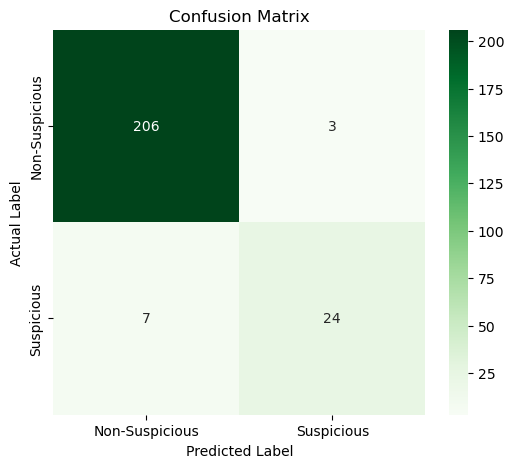

In [95]:
# Plot confusion matrix for Random Forest


plt.figure(figsize=(6,5))
sns.heatmap(cm_rfc, annot=True, fmt="d", cmap="Greens", xticklabels=["Non-Suspicious", "Suspicious"], yticklabels=["Non-Suspicious", "Suspicious"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [84]:
# Evaluating by checking the precision and recall score

precision_rfc = precision_score(y_test, rfc_pred)
recall_rfc = recall_score(y_test, rfc_pred)

In [85]:
# Random Forest Precision Score

precision_rfc

0.8888888888888888

In [86]:
# Random Forest Recall Score

recall_rfc

0.7741935483870968

# Part 3: Strategic Recommendation – Low-Volume Trader Campaign (Kenya)


## Low-Volume Trader Campaign (Kenya)

To support a targeted Low-Volume Trader marketing campaign in Kenya, I would define the audience using the following data points:

#### Total Trading Volume (USD)
Users in the lower percentile of cumulative trading volume, indicating cautious but active participation.

#### Trade Frequency
Users with infrequent trades, suggesting they are not yet fully engaged or confident.

#### Trade-to-Deposit Ratio
Users who deposit funds but trade only a small portion of their balance, indicating growth potential.

## Note:

Focus on users active in Kenya-related or local currency pairs.

Exclude users flagged as suspicious by the fraud detection model.